# U.S. Medical Insurance Costs

## 1. IMPORT RELEVANT LIBRARIES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. IMPORT INSURANCE DATA

In [5]:
insurance_data = pd.read_csv('insurance.csv')

## 3. DATA EXPLORATION

In [6]:
print(insurance_data.to_string())

      age     sex     bmi  children smoker     region       charges
0      19  female  27.900         0    yes  southwest  16884.924000
1      18    male  33.770         1     no  southeast   1725.552300
2      28    male  33.000         3     no  southeast   4449.462000
3      33    male  22.705         0     no  northwest  21984.470610
4      32    male  28.880         0     no  northwest   3866.855200
5      31  female  25.740         0     no  southeast   3756.621600
6      46  female  33.440         1     no  southeast   8240.589600
7      37  female  27.740         3     no  northwest   7281.505600
8      37    male  29.830         2     no  northeast   6406.410700
9      60  female  25.840         0     no  northwest  28923.136920
10     25    male  26.220         0     no  northeast   2721.320800
11     62  female  26.290         0    yes  southeast  27808.725100
12     23    male  34.400         0     no  southwest   1826.843000
13     56  female  39.820         0     no  sout

In [47]:
#Convert the dataset in to a list
datas = []

# Iterate over each row
for index, rows in insurance_data.iterrows():
    # Create list for the current row
    my_list =[rows.age, rows.sex, rows.bmi, rows.children, rows.smoker, rows.region, rows.charges]
      
    # append the list to the final list
    datas.append(my_list)
  
# Print the list
print(datas)

[[19, 'female', 27.9, 0, 'yes', 'southwest', 16884.924], [18, 'male', 33.77, 1, 'no', 'southeast', 1725.5523], [28, 'male', 33.0, 3, 'no', 'southeast', 4449.462], [33, 'male', 22.705, 0, 'no', 'northwest', 21984.47061], [32, 'male', 28.88, 0, 'no', 'northwest', 3866.8552], [31, 'female', 25.74, 0, 'no', 'southeast', 3756.6216], [46, 'female', 33.44, 1, 'no', 'southeast', 8240.5896], [37, 'female', 27.74, 3, 'no', 'northwest', 7281.5056], [37, 'male', 29.83, 2, 'no', 'northeast', 6406.4107], [60, 'female', 25.84, 0, 'no', 'northwest', 28923.13692], [25, 'male', 26.22, 0, 'no', 'northeast', 2721.3208], [62, 'female', 26.29, 0, 'yes', 'southeast', 27808.7251], [23, 'male', 34.4, 0, 'no', 'southwest', 1826.843], [56, 'female', 39.82, 0, 'no', 'southeast', 11090.7178], [27, 'male', 42.13, 0, 'yes', 'southeast', 39611.7577], [19, 'male', 24.6, 1, 'no', 'southwest', 1837.237], [52, 'female', 30.78, 1, 'no', 'northeast', 10797.3362], [23, 'male', 23.845, 0, 'no', 'northeast', 2395.17155], [56,

## 4. AVERAGE AGE OF THE PATEINTS IN THE DATASETS

In [49]:
ages = []
for data in datas:
    ages.append(data[0])
#print(ages)
average_age = round(sum(ages) / len(ages), 0)
print('The average age for both male and female is: ' + str(average_age))

The average age for both male and female is: 39.0


## 5. MOST FREQUENT LOCATION

In [50]:
regions = []
for data in datas:
    regions.append(data[5])
#print(regions)
locations = {}
total = 1

for region in regions:
    if region not in locations:
        locations[region] = total
    elif region in locations:
        locations[region] += 1
print(locations)

max_count = 0
majority_location = ''
for region, count in locations.items():
    if count > max_count:
        max_count = count
        majority_location = region
    else:
        max_count = max_count
        majority_location = majority_location
print('The region where majority of the individuals are from is ' + str(majority_location) + ' with a count of ' + str(max_count) + '.')

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
The region where majority of the individuals are from is southeast with a count of 364.


## 6. COST DIFFERENCE BETWEEN SMOKERS AND NON-SMOKERS

In [51]:
#print(datas)
list_of_smokers = []
list_of_non_smokers = []
for items in datas:
    if items[4] == 'yes':
        list_of_smokers.append(items)
    else:
        list_of_non_smokers.append(items)
#print(list_of_non_smokers)
#print(list_of_smokers)
        
def cost_difference(smokers, non_smokers):
    total_cost_smokers = 0
    total_cost_non_smokers = 0
    for smoker in smokers:
        total_cost_smokers += smoker[6]
    for non_smoker in non_smokers:
        total_cost_non_smokers += non_smoker[6]
    cost_diff = total_cost_smokers - total_cost_non_smokers
    return total_cost_smokers, total_cost_non_smokers, cost_diff

total_smokers, total_non_smokers, total_cost_difference = cost_difference(list_of_smokers, list_of_non_smokers)
print('\nThe total cost of smokers is $' + str(total_smokers))
print('The total cost of non-smokers is $' + str(total_non_smokers))
print('If you take away the cost of non-smokers from smokers, you get:')
print('A difference of (' + str(total_cost_difference) + ') was observed.')


The total cost of smokers is $8781763.52184
The total cost of non-smokers is $8974061.468918996
If you take away the cost of non-smokers from smokers, you get:
A difference of (-192297.9470789954) was observed.


OBSERVATIONS: The difference of a neagtive $192297.9470789954 was observed as the difference between the total cost of smokers
and total cost of non smokers. From the amount gotten above, we can infere the following pending confirmation from further anaysis:

1. Total number of smokers is less that the total number of non-smokers.
2. Total number of children attributed to non-smokers is higher than the total number of children attributed to smokers.
3. Age range in smokers and non-smokers.
4. Gender preference is higher in either category i.e. more male or more female.

## 7. FURTHER ANALYSIS IN RELATION TO NO.6

In [53]:
#Total number of smokers is less that the total number of non-smokers
def smoker_and_non_smoker_count(smokers_list, non_smokers_list):
    smokers_count = len(smokers_list)
    non_smokers_count = len(non_smokers_list)
    if smokers_count > non_smokers_count:
        count_diff = smokers_count - non_smokers_count
        print('The total no of smokers is ' + str(smokers_count) + '.')
        print('The total no of non-smokers is ' + str(non_smokers_count) + '.')
        print('NOTE: The SMOKERS are MORE than the NON-SMOKERS with a difference of ' + str(count_diff) + '.\n')
    else:
        count_diff = non_smokers_count - smokers_count
        print('The total no of smokers is ' + str(smokers_count) + '.')
        print('The total no of non-smokers is ' + str(non_smokers_count) + '.')
        print('NOTE: The NON-SMOKERS are MORE than the SMOKERS with a difference of ' + str(count_diff) + '.\n')
    
smoker_and_non_smoker_count(list_of_smokers, list_of_non_smokers)
print('NOTE: 80% of the dataset are non-smokers. This shows that the dataset is BIASED TOWARDS NON-SMOKERS.\n')

#Total number of children attributed to non-smokers is higher than the total number of children attributed to smokers.
def no_of_children(smokers_list, non_smokers_list):
    smokers_children = 0
    non_smokers_children = 0
    for items in smokers_list:
        smokers_children += items[3]
    for items in non_smokers_list:
        non_smokers_children += items[3]
    if smokers_children > non_smokers_children:
        count_diff = smokers_children - non_smokers_children
        print('The total no of children in the smokers category is ' + str(smokers_children) + '.')
        print('The total no of children in the non-smokers category is ' + str(non_smokers_children) + '.')
        print('NOTE: Therefore, SMOKERS have MORE children than NON-SMOKERS.')
    else:
        count_diff = non_smokers_children - smokers_children
        print('The total no of children in the smokers category is ' + str(smokers_children) + '.')
        print('The total no of children in the non-smokers category is ' + str(non_smokers_children) + '.')
        print('NOTE: Therefore, NON-SMOKERS have MORE children than SMOKERS.\n')

no_of_children(list_of_smokers, list_of_non_smokers)

#Age range in smokers and non-smokers. =============================================================
lower_age_range = list(range(18, 41, 1))
higher_age_range = list(range(41, 60, 1))

def age_range(smokers_list, non_smokers_list):
    
    smokers_lower_age_count = 0
    smokers_higher_age_count = 0

    non_smokers_lower_age_count = 0
    non_smokers_higher_age_count = 0
    
    #smokers
    for items in smokers_list:
        if items[0] in lower_age_range:
            smokers_lower_age_count += 1
        elif items[0] in higher_age_range:
            smokers_higher_age_count += 1
    #non-smokers
    for items in non_smokers_list:
        if items[0] in lower_age_range:
            non_smokers_lower_age_count += 1
        elif items[0] in higher_age_range:
            non_smokers_higher_age_count += 1
    return smokers_lower_age_count, smokers_higher_age_count, non_smokers_lower_age_count, non_smokers_higher_age_count

smoker_lower, smoker_higher, non_smoker_lower, non_smoker_higher = age_range(list_of_smokers, list_of_non_smokers)

print('The no of smokers within the age range of 18 - 40 is ' + str(smoker_lower) + '.')
print('The no of smokers within the age range of 41 - 60 is ' + str(smoker_higher) + '.')
print('The no of non-smokers within the age range of 18 - 40 is ' + str(non_smoker_lower) + '.')
print('The no of non-smokers within the age range of 41 - 60 is ' + str(non_smoker_higher) + '.')

The total no of smokers is 274.
The total no of non-smokers is 1064.
NOTE: The NON-SMOKERS are MORE than the SMOKERS with a difference of 790.

NOTE: 80% of the dataset are non-smokers. This shows that the dataset is BIASED TOWARDS NON-SMOKERS.

The total no of children in the smokers category is 305.
The total no of children in the non-smokers category is 1160.
NOTE: Therefore, NON-SMOKERS have MORE children than SMOKERS.

The no of smokers within the age range of 18 - 40 is 149.
The no of smokers within the age range of 41 - 60 is 98.
The no of non-smokers within the age range of 18 - 40 is 552.
The no of non-smokers within the age range of 41 - 60 is 425.


## 8. SMOKER AND CHILDREN ANALYSIS IN RELATION TO NO.6

In [54]:

def children_count(smokers_list):
    child_count_max = 0
    for items in smokers_list:
        if items[3] > child_count_max:
            child_count_max = items[3]
        else:
            child_count_max = child_count_max
    child_count_list = list(range(1, child_count_max + 1, 1))
    print(child_count_list)
    
    smoker_info = []
    for items in smokers_list:
        for item in items:
            smoker_info.append(item)
    #print(smoker_info)
            
    count_of_children = {}
    for item in smoker_info:
        if item in child_count_list and item not in count_of_children:
            count_of_children[item] = 1
        elif item in count_of_children:
            count_of_children[item] += 1
    return count_of_children

children_smoker = children_count(list_of_smokers)

print('\nFor those individuals identified as smokers,;')
print('\'5\' is the maximum number of children obsereved from the data.')
print('\nThe following were observed:')
for number_of_children, count_of_number in children_smoker.items():
    print(str(count_of_number) + ' individuals gave birth to ' + str(number_of_children) + ' offspring each.')
                

[1, 2, 3, 4, 5]

For those individuals identified as smokers,;
'5' is the maximum number of children obsereved from the data.

The following were observed:
61 individuals gave birth to 1 offspring each.
55 individuals gave birth to 2 offspring each.
39 individuals gave birth to 3 offspring each.
3 individuals gave birth to 4 offspring each.
1 individuals gave birth to 5 offspring each.


## 9. NON-SMOKER AND CHILDREN ANALYSIS IN RELATION TO NO.6

In [55]:
children_non_smoker = children_count(list_of_non_smokers)

print('\nFor those individuals identified as non-smokers,;')
print('\'5\' is the maximum number of children obsereved from the data.')
print('\nThe following were observed:')
for number_of_children, count_of_number in children_non_smoker.items():
    print(str(count_of_number) + ' individuals gave birth to ' + str(number_of_children) + ' offspring each.')

[1, 2, 3, 4, 5]

For those individuals identified as non-smokers,;
'5' is the maximum number of children obsereved from the data.

The following were observed:
263 individuals gave birth to 1 offspring each.
118 individuals gave birth to 3 offspring each.
185 individuals gave birth to 2 offspring each.
17 individuals gave birth to 5 offspring each.
22 individuals gave birth to 4 offspring each.


## 10. DOMINANT GENDER ANALYSIS IN RELATION TO NO.6

In [56]:
def gender_analysis(smokers_list, non_smokers_list):
    
    smokers_info = []
    for items in smokers_list:
        for item in items:
            smokers_info.append(item)
            
    non_smokers_info = []
    for items in non_smokers_list:
        for item in items:
            non_smokers_info.append(item)
    
    gender_list = ['male', 'female']
    
    gender_count_smoker = {}
    for item in smokers_info:
        if item in gender_list and item not in gender_count_smoker:
            gender_count_smoker[item] = 1
        elif item in gender_count_smoker:
            gender_count_smoker[item] += 1
            
    gender_count_nonsmoker = {}
    for item in non_smokers_info:
        if item in gender_list and item not in gender_count_nonsmoker:
            gender_count_nonsmoker[item] = 1
        elif item in gender_count_nonsmoker:
            gender_count_nonsmoker[item] += 1
    return gender_count_smoker, gender_count_nonsmoker

g_smoker, g_nonsmoker = gender_analysis(list_of_smokers, list_of_non_smokers)

print("Smoker Category:")
for gender, count_of_gender in g_smoker.items():
    print(str(count_of_gender) + ' individuals are ' + str(gender) + '.')

print('\nNon-smoker Category:')    
for gender, count_of_gender in g_nonsmoker.items():
    print(str(count_of_gender) + ' individuals are ' + str(gender) + '.')  

Smoker Category:
115 individuals are female.
159 individuals are male.

Non-smoker Category:
517 individuals are male.
547 individuals are female.


NOTE: There are MORE MALE SMOKERS THAN FEMALE SMOKERS and there are MORE FEMALE NON-SMOKERS THAN MALE NON-SMOKERS

## 11. AVERAGE AGE FOR AN INDIVIDUAL WITH ATLEAST A CHILD IN THE DATASET

In [15]:
#Dataset with only children
def dataset_children(data):
    dataset_with_children = []
    for item in data:
        if item[3] != 0:
            dataset_with_children.append(item)
    return dataset_with_children

dataset_with_children = dataset_children(datas)

#Average age of dataset with atleast a child
def average_age(data):
    ages = []
    total_age = 0
    for items in data:
        ages.append(items[0])
    age_count = len(ages)
    for items in ages:
        total_age += items
    average = total_age / age_count
    return average

age_average = int(round(average_age(dataset_with_children), 0))
print('\nThe average age of individuals with atleast a child is ' + str(age_average) + '.\n')


The average age of individuals with atleast a child is 40.



## 12. OBTAIN RANGE OF AGES

In [16]:
def range_of_ages(data):
    age_range_count = {}
    R_18_30 = list(range(18, 31, 1))
    R_31_40 = list(range(31, 41, 1))
    R_41_50 = list(range(41, 51, 1))
    R_51_60 = list(range(51, 61, 1))
    R_61_ab = list(range(61, 100, 1))
    for items in data:
        if items[0] in R_18_30 and '18 to 30' not in age_range_count:
            age_range_count['18 to 30'] = 1
        elif items[0] in R_31_40 and '31 to 40' not in age_range_count:
            age_range_count['31 to 40'] = 1
        elif items[0] in R_41_50 and '41 to 50' not in age_range_count:
            age_range_count['41 to 50'] = 1
        elif items[0] in R_51_60 and '51 to 60' not in age_range_count:
            age_range_count['51 to 60'] = 1
        elif items[0] in R_61_ab and '61 and above' not in age_range_count:
            age_range_count['61 and above'] = 1
        elif items[0] in R_18_30 and '18 to 30' in age_range_count:
            age_range_count['18 to 30'] += 1
        elif items[0] in R_31_40 and '31 to 40' in age_range_count:
            age_range_count['31 to 40'] += 1
        elif items[0] in R_41_50 and '41 to 50' in age_range_count:
            age_range_count['41 to 50'] += 1
        elif items[0] in R_51_60 and '51 to 60' in age_range_count:
            age_range_count['51 to 60'] += 1
        elif items[0] in R_61_ab and '61 and above' in age_range_count:
            age_range_count['61 and above'] += 1
    return age_range_count

age_ranges = range_of_ages(datas)
for ranges, age_count in age_ranges.items():
    print('There are ' + str(age_count) + ' individuals in the range of ' + str(ranges) + '.\n')

There are 444 individuals in the range of 18 to 30.

There are 257 individuals in the range of 31 to 40.

There are 281 individuals in the range of 41 to 50.

There are 265 individuals in the range of 51 to 60.

There are 91 individuals in the range of 61 and above.



## 13. BODY MASS INDEX ANALYSIS

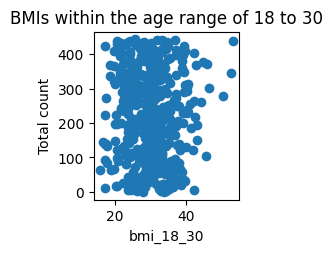

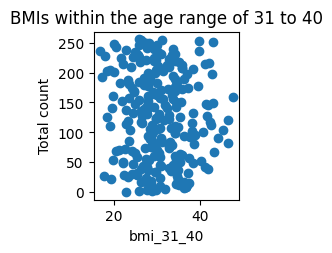

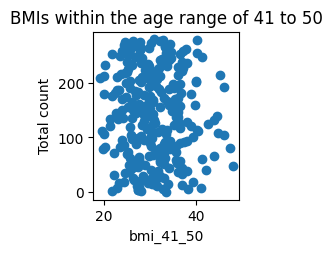

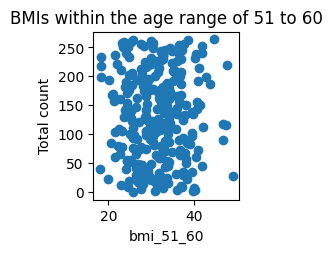

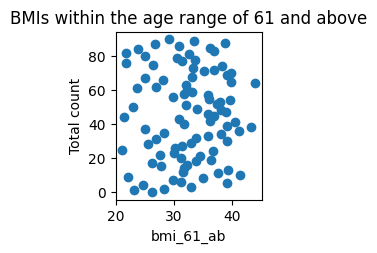

In [46]:
def bmi_analysis(data):
    R_18_30 = list(range(18, 31, 1))
    R_31_40 = list(range(31, 41, 1))
    R_41_50 = list(range(41, 51, 1))
    R_51_60 = list(range(51, 61, 1))
    R_61_ab = list(range(61, 100, 1))
    
    bmi_18_30 = []
    bmi_31_40 = []
    bmi_41_50 = []
    bmi_51_60 = []
    bmi_61_ab = []
    
    for items in data:
        if items[0] in R_18_30:
            bmi_18_30.append(items[2])
        elif items[0] in R_31_40:
            bmi_31_40.append(items[2])
        elif items[0] in R_41_50:
            bmi_41_50.append(items[2])
        elif items[0] in R_51_60:
            bmi_51_60.append(items[2])
        elif items[0] in R_61_ab:
            bmi_61_ab.append(items[2])
            
    return bmi_18_30, bmi_31_40, bmi_41_50, bmi_51_60, bmi_61_ab

bmi_18_30, bmi_31_40, bmi_41_50, bmi_51_60, bmi_61_ab = bmi_analysis(datas)


#1. Graphical representation of bmis withing the age range of 18 to 30
x_1 = np.array(bmi_18_30)
y_1 = np.array(list(range(len(bmi_18_30))))

plt.subplot(2, 3, 1)
plt.scatter(x_1, y_1)
plt.title("BMIs within the age range of 18 to 30")
plt.xlabel("bmi_18_30")
plt.ylabel("Total count")
plt.show()

#2. Graphical representation of bmis withing the age range of 31 to 40
x_2 = np.array(bmi_31_40)
y_2 = np.array(list(range(len(bmi_31_40))))

plt.subplot(2, 3, 2)
plt.scatter(x_2, y_2)
plt.title("BMIs within the age range of 31 to 40")
plt.xlabel("bmi_31_40")
plt.ylabel("Total count")
plt.show()

#3. Graphical representation of bmis withing the age range of 41 to 50
x_3 = np.array(bmi_41_50)
y_3 = np.array(list(range(len(bmi_41_50))))

plt.subplot(2, 3, 3)
plt.scatter(x_3, y_3)
plt.title("BMIs within the age range of 41 to 50")
plt.xlabel("bmi_41_50")
plt.ylabel("Total count")
plt.show()

#4. Graphical representation of bmis withing the age range of 51 to 60
x_4 = np.array(bmi_51_60)
y_4 = np.array(list(range(len(bmi_51_60))))

plt.subplot(2, 3, 4)
plt.scatter(x_4, y_4)
plt.title("BMIs within the age range of 51 to 60")
plt.xlabel("bmi_51_60")
plt.ylabel("Total count")
plt.show()

#5. Graphical representation of bmis withing the age range of 61 and above
x_5 = np.array(bmi_61_ab)
y_5 = np.array(list(range(len(bmi_61_ab))))

plt.subplot(2, 3, 5)
plt.scatter(x_5, y_5)
plt.title("BMIs within the age range of 61 and above")
plt.xlabel("bmi_61_ab")
plt.ylabel("Total count")
plt.show()

NOTE: From the 5 scattetr plots above,
it can be observed that most bmi's in all ranges fall within the 20 to 40 bracket range with few outliers in the range of 40 to 50. Age range 61 and above shows the least number of individuals. 